In [49]:
import networkx as nx
import numpy as np
import time
import matplotlib.pyplot as plt

def dijkstra_dp(graph, source):
    distances = {}
    for node in graph.nodes:
        distances[node] = float('inf')
    distances[0] = 0
    
    visited = set()

    while len(visited) < len(graph):
        node = min((set(distances.keys()) - visited), key=distances.get)
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                new_distance = distances[node] + graph[node][neighbor]['weight']
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance

    return distances


In [50]:

def floyd_warshall_dp(graph):
    num_nodes = len(graph.nodes)
    dist = np.full((num_nodes, num_nodes), float('inf'))

    for u in graph.nodes:
        dist[u][u] = 0

    for u, v, weight in graph.edges.data('weight'):
        dist[u][v] = weight

    for k in graph.nodes:
        for i in graph.nodes:
            for j in graph.nodes:
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist


In [51]:

def generate_graph(num_nodes):
    graph = nx.DiGraph()

    # Generate random weighted edges
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                weight = np.random.randint(1, num_nodes)  
                graph.add_edge(i, j, weight=weight)

    return graph


+-------------------+----------------------+----------------------------+
|   Number of Nodes |   Dijkstra (seconds) |   Floyd-Warshall (seconds) |
+===================+======================+============================+
|                10 |              0.00199 |                    0.00299 |
+-------------------+----------------------+----------------------------+
|                50 |              0.14961 |                    0.32873 |
+-------------------+----------------------+----------------------------+
|               100 |              1.03928 |                    2.73137 |
+-------------------+----------------------+----------------------------+
|               150 |              3.64984 |                    7.98363 |
+-------------------+----------------------+----------------------------+
|               200 |              6.88672 |                   19.08041 |
+-------------------+----------------------+----------------------------+
|               300 |             26.0

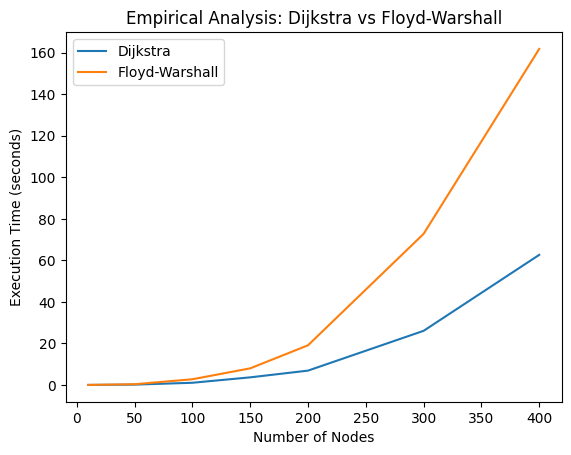

In [52]:
from tabulate import tabulate

def plot_results(num_nodes, dijkstra_times, floyd_warshall_times):
    plt.plot(num_nodes, dijkstra_times, label='Dijkstra')
    plt.plot(num_nodes, floyd_warshall_times, label='Floyd-Warshall')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Empirical Analysis: Dijkstra vs Floyd-Warshall')
    plt.legend()
    plt.show()

def display_results(num_nodes, dijkstra_times, floyd_warshall_times):
    headers = ["Number of Nodes", "Dijkstra (seconds)", "Floyd-Warshall (seconds)"]
    data = zip(num_nodes, dijkstra_times, floyd_warshall_times)
    table = tabulate(data, headers=headers, floatfmt=".5f", tablefmt="grid")
    print(table)

# Number of nodes to test
num_nodes = [10, 50, 100, 150, 200, 300, 400]

dijkstra_times = []
floyd_warshall_times = []

for num in num_nodes:
    graph = generate_graph(num)

    # Dijkstra
    start_time = time.time()
    for node in graph.nodes:
        dijkstra_dp(graph, node)
    dijkstra_time = time.time() - start_time
    dijkstra_times.append(dijkstra_time)

    # Floyd-Warshall
    start_time = time.time()
    floyd_warshall_dp(graph)
    floyd_warshall_time = time.time() - start_time
    floyd_warshall_times.append(floyd_warshall_time)
    
display_results(num_nodes, dijkstra_times, floyd_warshall_times)
plot_results(num_nodes, dijkstra_times, floyd_warshall_times)
